# Sensors & Sensing
## Homework Assignment №1
---
## Anton Buguev BS19-RO-01
#### a.buguev@innopolis.university
#### 10 April 2022

## Task1. Case 1

### Read data from text file, where 1st column represents time and 2nd column roll angle of the UAV.

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data1 = pd.read_csv("case1.txt", header=None)
data1.columns = ['time', 'angle']

### Plot data

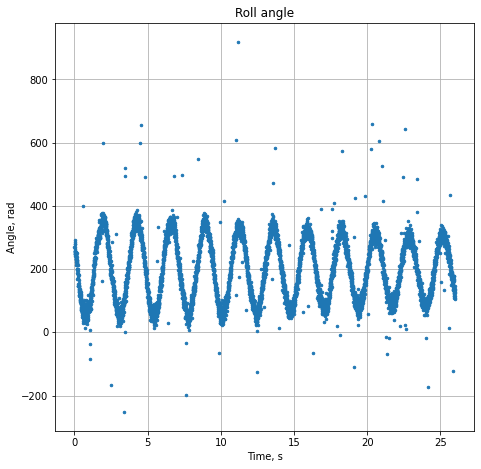

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5, 7.5))
time_arr = data1['time']
angle_arr = data1['angle']
ax1.plot(time_arr, angle_arr, '.', markersize=5)
ax1.set_title("Roll angle")
ax1.set_xlabel("Time, s")
ax1.set_ylabel("Angle, rad")
ax1.grid()
plt.show()

As we can see, there are some outlliners on the plot that represent errors and we need to exclude them from our data.


### To exclude outliners we first need to find the mean value:
$$\mu = \bar{x}$$ 
### and the standart deviation of the data:
$$\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}$$

In [32]:
mean_angle = np.mean(angle_arr)
sigma = np.sqrt(np.sum((angle_arr - mean_angle)**2)/(len(angle_arr)-1))
print(f"Mean value: {mean_angle}")
print(f"Standart deviation: {sigma}")

Mean value: 197.9183074
Standart deviation: 99.73110936701279


$$\mu = 197.92$$
$$\sigma = 99.73$$

### Since we have confidence level 99.9%, therefore confidence interval is 
$$(\mu - 3\sigma; \mu+3\sigma)$$
### So let us update our data. Basically if any data point does not belong to the confidence interval we exclude it, otherwise we keep it.

In [33]:
upd_time_arr, upd_angle_arr = [], []
for i in range(len(angle_arr)):
  if angle_arr[i] > mean_angle - 3 * sigma and angle_arr[i] < mean_angle + 3 * sigma:
    upd_time_arr.append(time_arr[i])
    upd_angle_arr.append(angle_arr[i])
upd_time_arr = np.array(upd_time_arr)
upd_angle_arr = np.array(upd_angle_arr)
print(f"{len(angle_arr) - len(upd_angle_arr)} outliners have been removed.")

22 outliners have been removed.


### Plot updated data

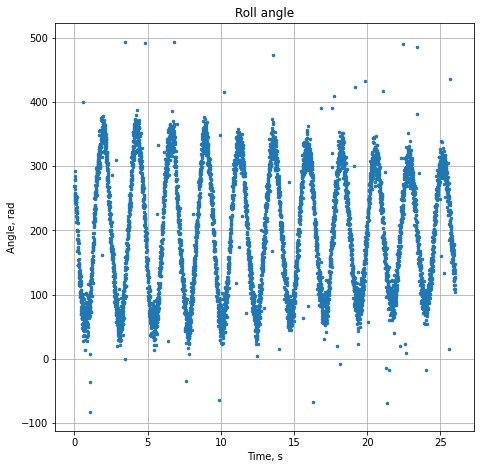

In [34]:
fig, ax2 = plt.subplots(1, 1, figsize=(7.5, 7.5))
ax2.plot(upd_time_arr, upd_angle_arr, '.', markersize=5)
ax2.set_title("Roll angle")
ax2.set_xlabel("Time, s")
ax2.set_ylabel("Angle, rad")
ax2.grid()
plt.show()

As we can see, some points have been removed from our data, however due to high confidence level we still have big amount of outliners.

### Now let us calculate new confidence interval for updated data, where mean value:
$$\mu = \bar{x}$$
### standart deviation:
$$\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}$$
### standart error:
$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$
### margin error:
$$ME=z\sigma_{\bar{x}}$$
### where $z = 3.2905$ for confidence level 99.9%
### and the confidence interval is:
$$\mu \pm ME$$

In [35]:
upd_mean_angle = np.mean(upd_angle_arr)

upd_sigma = np.sqrt(np.sum((upd_angle_arr - upd_mean_angle)**2)/(len(upd_angle_arr)-1))

upd_sigma_err = upd_sigma / np.sqrt(len(upd_angle_arr))

z = 3.2905
ME = z * upd_sigma_err

print(f"Mean value: {upd_mean_angle} rad.")
print(f"Standart deviation: {upd_sigma}.")
print(f"Standart error: {upd_sigma_err}.\n")
print(f"Confidence interval: {upd_mean_angle} +- {ME} rad.")

Mean value: 197.36020656066688 rad.
Standart deviation: 97.08453912451864.
Standart error: 1.206228544338227.

Confidence interval: 197.36020656066688 +- 3.969095025144936 rad.


### Now let us make linear regression for updated data.
We have equation in matrix form:

$$
\begin{pmatrix}
  y_1 \\
  y_2 \\
  . \\
  . \\
  . \\
  y_n
\end{pmatrix}
 = 
 \begin{pmatrix}
  1 & x_1 \\
  1 & x_2 \\
  . & . \\
  . & . \\
  . & . \\
  1 & x_n
\end{pmatrix}
\begin{pmatrix}
  \beta_0 \\
  \beta_1
\end{pmatrix}
+
\begin{pmatrix}
  \epsilon_1 \\
  \epsilon_2 \\
  . \\
  . \\
  . \\
  \epsilon_n
\end{pmatrix}
$$

which is

$$Y=X\beta+\epsilon$$
where $Y$ - angle values, $X$ - time array, $\beta$ - coefficients and $\epsilon$ - error.
Trying to minimze the error we get:
$$\beta = (X^TX)^{-1}X^TY$$

In [36]:
ones = np.ones(len(upd_time_arr))
upd_time_arr_ones = np.stack((ones,upd_time_arr), axis=1)

In [37]:
beta = np.array(np.linalg.inv(np.transpose(upd_time_arr_ones) @ upd_time_arr_ones) @ np.transpose(upd_time_arr_ones) @ upd_angle_arr)

line = []
for i in range(len(upd_time_arr)):
  line.append(np.sum(upd_time_arr_ones[i] * beta))

line = np.array(line)

### Plot the final result

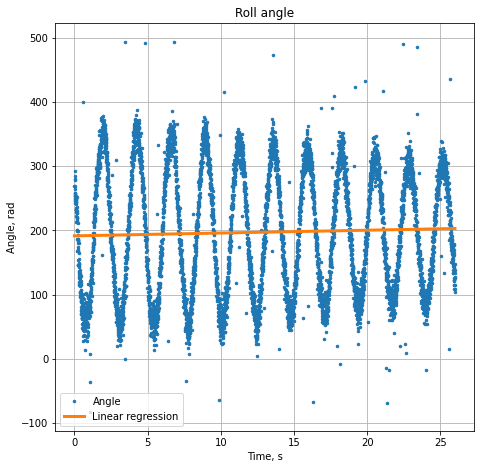

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
ax.plot(upd_time_arr, upd_angle_arr, '.', markersize=5, label="Angle")
ax.plot(upd_time_arr, line, linewidth=3, label="Linear regression")
ax.set_title("Roll angle")
ax.set_xlabel("Time, s")
ax.set_ylabel("Angle, rad")
ax.legend()
ax.grid()
plt.show()

### Conclusion
As we can see, the line does not fit plotted data properly because linear regression is not the most appropriate method for this dataset.

## Task 2

### Read data from text file, where rows represent coordinates of points.

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data2 = pd.read_csv("data_set_3_.txt", header=None)
data2.columns = ['c1', 'c2', 'c3']

arr1 = data2['c1']
arr2 = data2['c2']
arr3 = data2['c3']

### Plot the data choosing the most appropriate side for data display

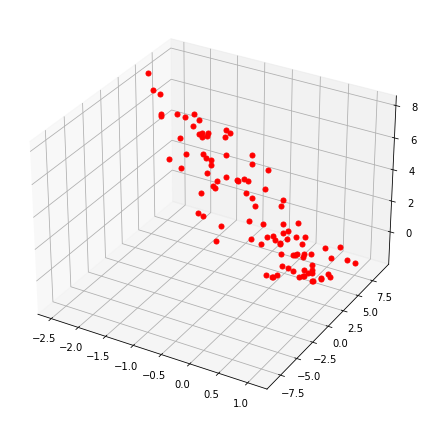

In [40]:
fig = plt.figure(figsize=(7.5, 7.5))
ax = plt.axes(projection='3d')
ax.plot3D(arr3, arr1, arr2, '.', color='red', ms=10)
plt.show()

x_data, y_data, z_data = arr3, arr1, arr2

As we can assume our dataset represent a plane, so let us use RANSAC method for building corresponding plane.
For better result let us make probability of success run: $P(selected\ as\ success\ run)=0.99$ and $q_{inliner}=0.9$. Therefore, using formula we can find how many times we have to select points to build a plane:

$$h = \frac{log(1-P(selected\ as\ success\ run))}{log(1-q^k_{inliner})}$$

where $k=3$ since to build a plane we need $3$ points.

In [54]:
P_success = 0.99
q_inliner = 0.9
k = 3
h = int(np.ceil(np.log(1-P_success)/(np.log(1-q_inliner**k))))
print(f"Number of iterations: {h}")

Number of iterations: 4


So we have:

$$h=\lceil\frac{log(0.01)}{log(1-0.9^3)}\rceil = 4$$
That means that we have to select 3 random points 4 times.

### Implement RANSAC method.

#### Find indexes of randomly selected points
We have indexes of all our points from original dataset. So instead of selecting points by value, we select them by index. After choosing index of point, its index is removed from an array so this point will not be selected again to avoid rare but possible situation when 1 point is selected twice or even more for calculating the same plane.

In [42]:
def find_indexes(indexes):
  points = []
  for i in range(3):
    points.append(choice(indexes))
    indexes.remove(points[i])
  return points, indexes

#### Find coefficients of plane using 3 points
This function finds coefficients $A, B, C, D$ of the plane using 3 points which belong to that plane.

In [43]:
from random import choice
from sklearn.metrics import mean_squared_error

# This function is taken from https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
# and sligtly modified
def find_coefficients(p1, p2, p3):

  v1 = p3 - p1
  v2 = p2 - p1
  
  # the cross product is a vector normal to the plane
  cp = np.cross(v1, v2)
  a, b, c = cp
  
  # This evaluates a * x3 + b * y3 + c * z3 which equals d
  d = -np.dot(cp, p3)
  
  return a, b, c, d

#### Select 3 random points, find coefficients of plane and calculate MSE.
After points are selected and coefficients are found, we need to calculate MSE. It is done by comparing predicted coordinate $z_{pred}$ with existing cooridnate $z$. After that we compare current MSE with previous smallest MSE and if the current MSE is smaller, then we update value of MSE and save coefficients $A, B, C, D$ which are currently better.


In [44]:
def find_plane(x_data, y_data, z_data, h):
  MSE = float('inf')
  A, B, C, D = 0, 0, 0, 0
  indexes = np.arange(0, len(x_data)).tolist()
  for i in range(h):
    
    (p1_index, p2_index, p3_index), indexes = find_indexes(indexes)

    p1 = np.array([x_data[p1_index], y_data[p1_index], z_data[p1_index]])
    p2 = np.array([x_data[p2_index], y_data[p2_index], z_data[p2_index]])
    p3 = np.array([x_data[p3_index], y_data[p3_index], z_data[p3_index]])

    a, b, c, d = find_coefficients(p1, p2, p3)

    print(f"The equation #{i} is {a}*x + {b}*y + {c}*z + {d} = 0")

    zz = (-a * x_data - b * y_data - d) / c
    MSE_new = mean_squared_error(z_data, zz)

    if MSE_new < MSE:
      MSE = MSE_new
      A, B, C, D = a, b, c, d
  return A, B, C, D, MSE

#### Print final coefficients.

In [55]:
A, B, C, D, MSE = find_plane(x_data, y_data, z_data, h)
print(f"\nFinal indexes of equation Ax + By + Cz + D = 0 of the plane are:\nA = {A}\nB = {B}\nC = {C}\nD = {D}\n\nMSE:{MSE}")

The equation #0 is -15.644151384*x + -1.9555107279999995*y + -5.866563965170002*z + 19.555178025461423 = 0
The equation #1 is -30.583037208451998*x + -3.8228896207859995*y + -11.468644203151998*z + 38.22883192019758 = 0
The equation #2 is -7.851502779400006*x + -0.9814402498600012*y + -2.9443052504599994*z + 9.814342219921556 = 0
The equation #3 is 8.980080580499997*x + 1.1225213849999998*y + 3.3675216144*z + -11.225032726660075 = 0

Final indexes of equation Ax + By + Cz + D = 0 of the plane are:
A = -30.583037208451998
B = -3.8228896207859995
C = -11.468644203151998
D = 38.22883192019758

MSE:3.6479913219311676e-11


### Plot result plane.

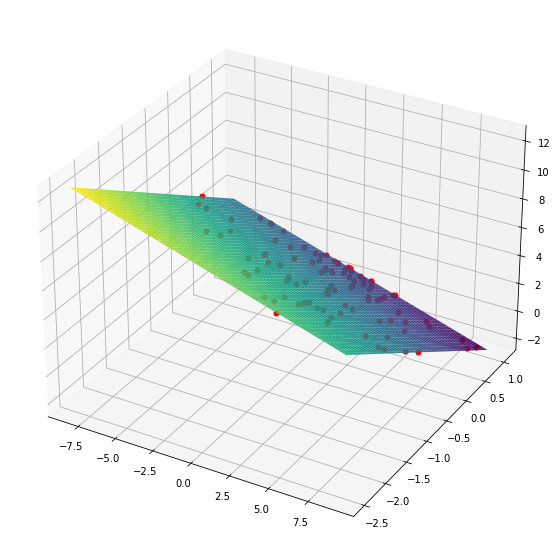

In [56]:
# Realisation of plotting surface is taken from here https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
def plane_equation(x, y, a, b, c, d):
  return (-x * a - y * b - d) / c

x_data_plane = np.linspace(np.min(x_data), np.max(x_data), 100)
y_data_plane = np.linspace(np.min(y_data), np.max(y_data), 100)

X, Y = np.meshgrid(x_data_plane, y_data_plane)
zs = np.array(plane_equation(np.ravel(X), np.ravel(Y), A, B, C, D))
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(y_data, x_data, z_data, '.', color='red', ms=10)
ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='none')
plt.show()

### Conclusion
As we can see, the plane fits original points which means that method is correct.